# US Superstore Data Analysis


---



## Problem Statement
Our task is to analyze the sales data and identify weak areas and opportunities for Super Store to boost business growth.

### We expect following Q/As from the Business point of view
1. Which Category is Best Selling and Most Profitable?
2. What are the Best Selling and Most Profitable Sub-Category?
3. Which is the Top Selling Sub-Category?
4. Which Customer Segment is Most Profitable?
5. Which is the Preferred Ship Mode?
6. Which Region is the Most Profitable?
7. Which City has the Highest Number of Sales?
8. Which Discount Rate Yields the Highest Sales and Profit?
9. What is the Average Discount rate of each sub-Categories?
10. Choose a suitable discount rate for individual subcategory products?


### We import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load DataSet

In [2]:
# load dataSet and store on variable

df = pd.read_csv("C:\\Users\\EXNASIR\\Desktop\\p\\second_project_python - Orders.csv")

In [3]:
#df = pd.read_excel("/content/drive/MyDrive/US Superstore data.xls")

In [4]:
# View the dataSet
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Statistical Summary of Data
how many rows and columns are there, and also see columns data types this is important for analysis

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.shape

(9994, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
df.describe().T.style.background_gradient(subset=['25%','75%'], cmap='Greys')

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.000000,4997.500000,2885.163629,1.000000,2499.250000,4997.500000,7495.750000,9994.000000
Postal Code,9994.000000,55190.379428,32063.693350,1040.000000,23223.000000,56430.500000,90008.000000,99301.000000
Sales,9994.000000,229.858001,623.245101,0.444000,17.280000,54.490000,209.940000,22638.480000
Quantity,9994.000000,3.789574,2.225110,1.000000,2.000000,3.000000,5.000000,14.000000
Discount,9994.000000,0.156203,0.206452,0.000000,0.000000,0.200000,0.200000,0.800000
Profit,9994.000000,28.656896,234.260108,-6599.978000,1.728750,8.666500,29.364000,8399.976000


### Dealing with missing values

In [9]:
#count missing values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Dealing With Unnecessary Columns

In [10]:
df = df.drop("Row ID" ,axis=1)

In [11]:
df= df.drop("Country",axis=1)

In [12]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Dealing With Duplicate Value

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(9993, 19)

### Exploratory Data Analysis

#### First find the Correlation

C:\Users\EXNASIR\AppData\Local\Temp\ipykernel_412\3249208477.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


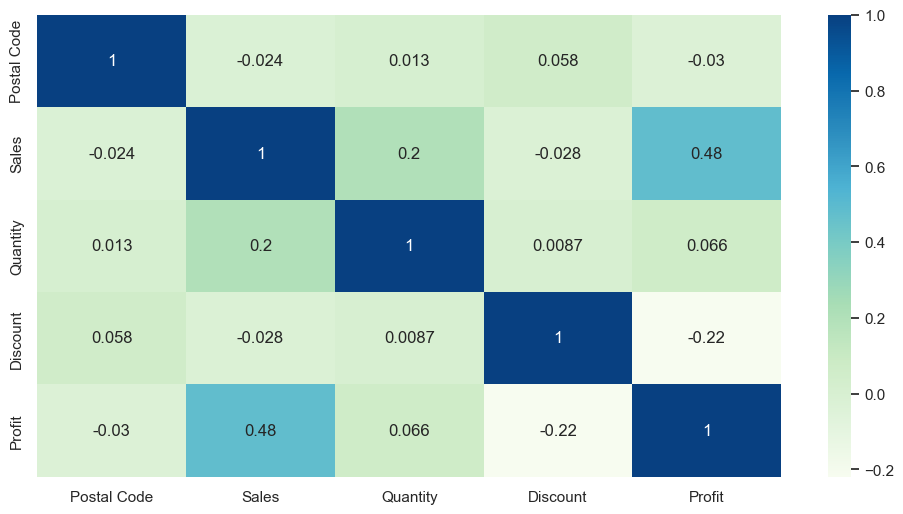

In [16]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
#This correlation
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'GnBu')

### Creating New Columns
1.Profit Margin formula (profit/sales)*100

In [17]:
df['Profit Margin'] = (df.Profit / df.Sales) * 100


In [18]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25


In [19]:
# Get descriptive statistics summary
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order ID,9993,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9993,1237,9/5/2016,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,9993,1334,12/16/2015,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,9993,4,Standard Class,5967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9993,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Name,9993,793,William Brown,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9993,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9993,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9993,49,California,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,9993.0,NaN,NaN,NaN,55191.576403,32065.074478,1040.0,23223.0,56560.0,90008.0,99301.0


### Questions Solving Phase

### Q1 Which Category is Best Selling and Most Profitable?

In [20]:
 # Group sales, profit and quantity by category

df1 = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())


In [21]:
df1

,Sales,Profit,Quantity
Category,,,
Furniture,741718.4233,18463.3316,8026
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


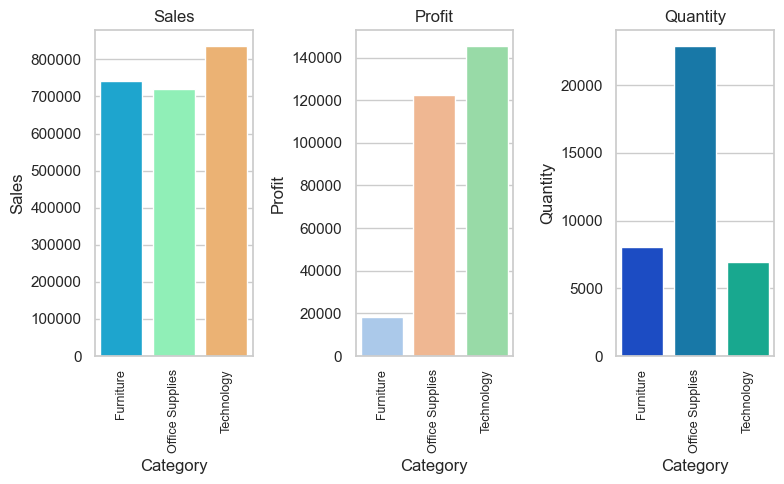

In [22]:
# Graph of q1
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))
# Plot barplots
cat1 = sns.barplot(x = df1.index, y = df1.Sales, ax=axis[0], palette = "rainbow")
cat2 = sns.barplot(x = df1.index, y = df1.Profit, ax=axis[1], palette = "pastel")
cat3 = sns.barplot(x = df1.index, y = df1.Quantity, ax=axis[2], palette = "winter")
# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)
# Set spacing between subplots
figure.tight_layout()

###### Our Analysis
All 3 categories — Furniture and Office Supplies were make similar amount of sales but Technology amount of sales was way far
Technology is Best Selling and it’s good to know that this category is the Most Profitable too. Only a minimal quantity is sold as these products are usually one-off purchases that can last at least 4–5 years.
Furniture is the least profitable and quantity sold is at a minimum too.
Office Supplies sell the most in terms of quantity as it is a relatively cheap product.


### Q2 What are the Best Selling and Most Profitable Sub-Category?

In [23]:
 # Group by sub-category

df2 = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

# Sort by descending order according to sales

subcat_df2 = pd.DataFrame(df2.sort_values('Sales', ascending = False))


In [24]:
subcat_df2

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328167.7310,26602.2251
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [25]:
# Sort by descending order according to profit

subcat_profit_df2 = pd.DataFrame(subcat_df2.sort_values('Profit', ascending = False))

subcat_profit_df2

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328167.7310,26602.2251
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


In [26]:
subcat_profit_df21 = pd.DataFrame(subcat_df2.sort_values('Profit', ascending = True))

subcat_profit_df21.head(10)

,Sales,Profit
Sub-Category,,
Tables,206965.5320,-17725.4811
Bookcases,114879.9963,-3472.5560
Supplies,46673.5380,-1189.0995
Fasteners,3024.2800,949.5182
Machines,189238.6310,3384.7569
Labels,12486.3120,5546.2540
Art,27118.7920,6527.7870
Envelopes,16476.4020,6964.1767
Furnishings,91705.1640,13059.1436


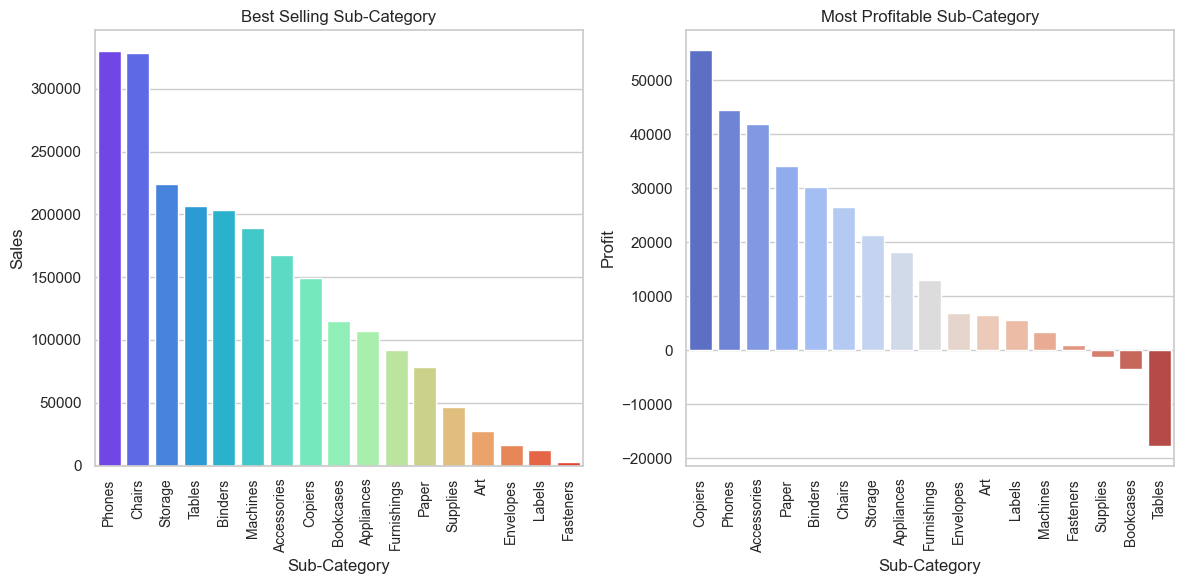

In [27]:
sns.set_theme(style="whitegrid")


figure, axis = plt.subplots(1, 2, figsize=(12, 6))

subcat1 = sns.barplot(data = subcat_df2, x = subcat_df2.index, y = subcat_df2.Sales, ax=axis[0], palette = "rainbow")
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

subcat2 = sns.barplot(data = subcat_profit_df2, x = subcat_profit_df2.index, y = subcat_profit_df2.Profit, ax=axis[1], palette = "coolwarm")
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

figure.tight_layout()

plt.show()

###### Let’s analyse the bar plots
Phones and Chairs are Top 2 best selling sub-category.

Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.

On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

## Q3.Which is the Top Selling Sub-Category?

In [28]:
df3 = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))

In [29]:
df3

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2354
Appliances,1729


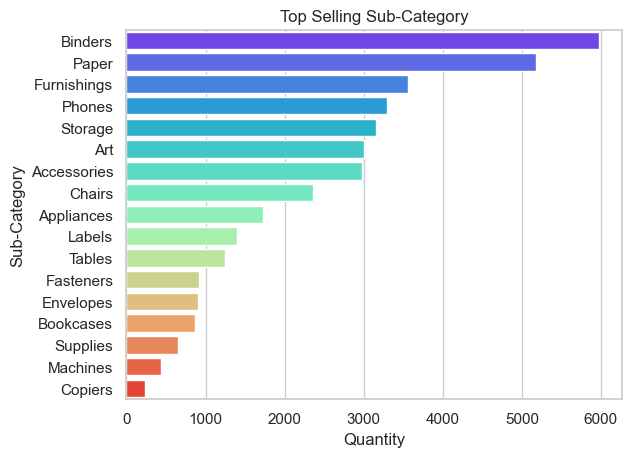

In [30]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df3, y = df3.index, x = df3.Quantity, palette = "rainbow")
plt.title("Top Selling Sub-Category")
plt.show()

###### we can deduce that
Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.

Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among al

## Q4. Which Customer Segment is Most Profitable?

In [31]:
df4 = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())

In [32]:
df4

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60310.7373


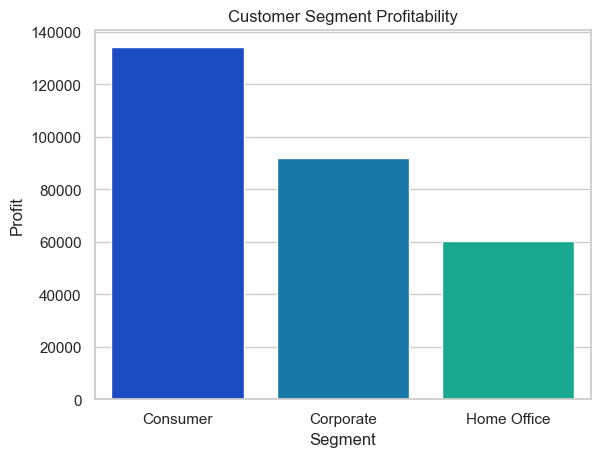

In [33]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df4, x = df4.index, y = df4.Profit, palette = "winter")
plt.title("Customer Segment Profitability")
plt.show()

Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.

# Q5. Which is the Preferred Ship Mode?

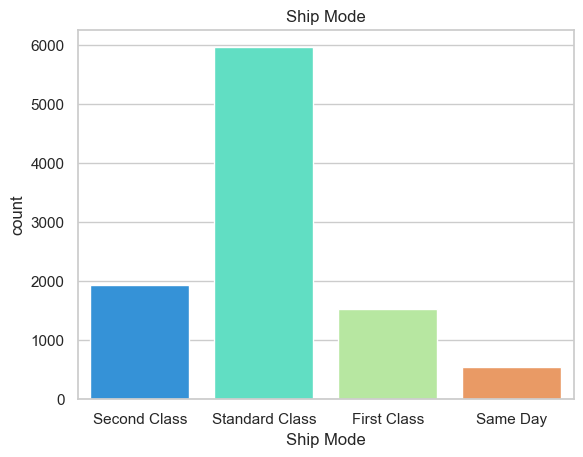

In [34]:
sns.set_theme(style="whitegrid")
sns.countplot(data=df, x='Ship Mode', palette="rainbow")

plt.title("Ship Mode")
plt.show()

###### By a landslide, Standard Class is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular among the customers and may be too costly.

## Q6.Which Region is the Most Profitable?

In [35]:
df5 = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())

df5

,Region,Profit
0,Central,39706.3625
1,East,91534.8388
2,South,46749.4303
3,West,108418.4489


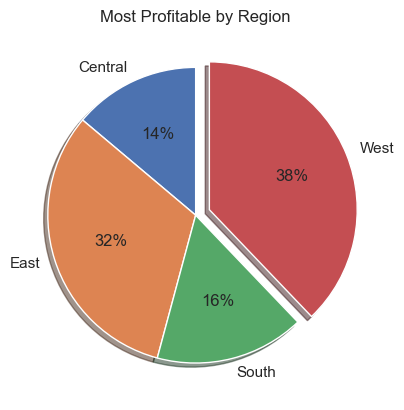

In [36]:
explode = [0, 0, 0, 0.1]
plt.pie(df5.Profit, labels = df5.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)

plt.title("Most Profitable by Region")

plt.show()

East and West region are most profitable.

## Q7. Which City has the Highest Number of Sales?

In [37]:
city_sales_df = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))

top10 = city_sales_df[:10]

top10

C:\Users\EXNASIR\AppData\Local\Temp\ipykernel_412\2369898876.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city_sales_df = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))


,Sales,Quantity
City,,
New York City,256368.1610,3417
Los Angeles,175851.3410,2879
Seattle,119540.7420,1590
San Francisco,112669.0920,1935
Philadelphia,109077.0130,1981
Houston,64504.7604,1466
Chicago,48539.5410,1132
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [38]:
bottom10 = city_sales_df[-10:]

bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


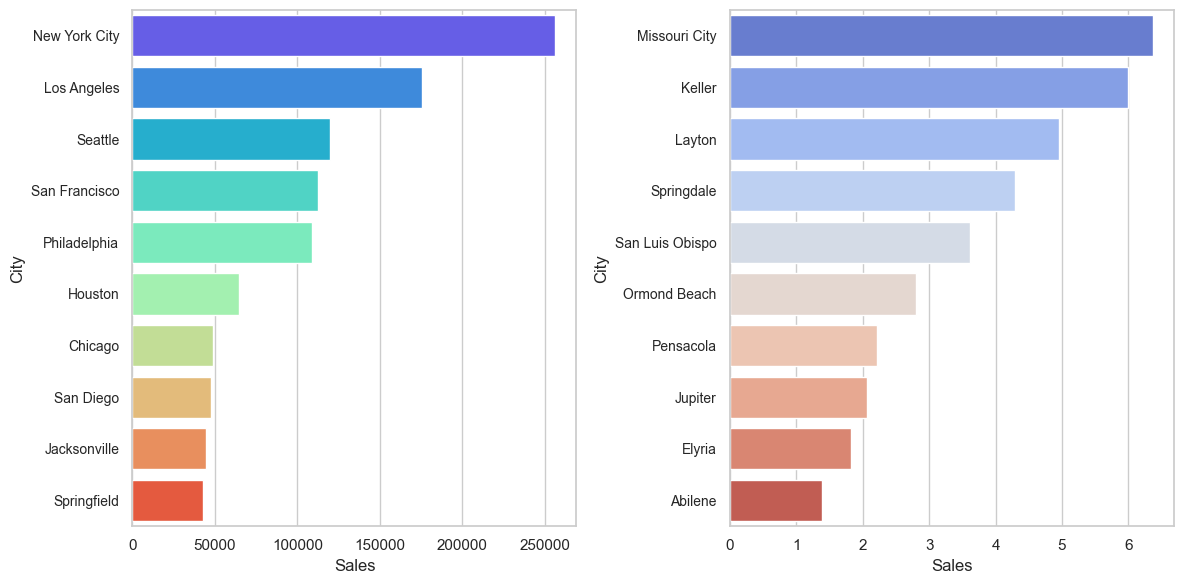

In [39]:
figure, axis = plt.subplots(1,2, figsize=(12, 6))

sns.set_theme(style="whitegrid")


top10c = sns.barplot(data = top10, y = top10.index, x = top10.Sales, palette = "rainbow", ax = axis[0])
#top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.Sales, palette = "coolwarm", ax=axis[1])
#bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots

figure.tight_layout()
plt.show()

In [40]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Profit Margin'],
      dtype='object')

## Q8. Which Discount Rate Yields the Highest Sales and Profit?

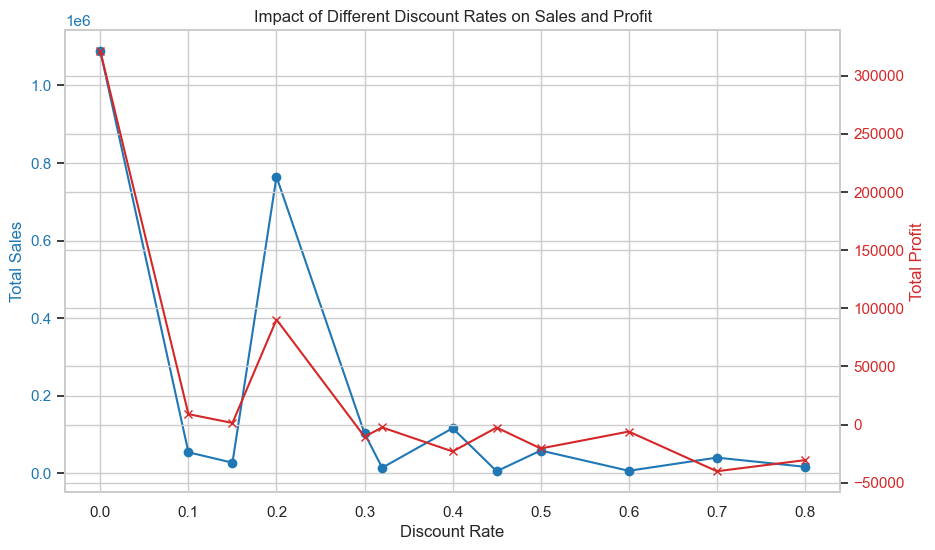

In [41]:
data = df[['Discount', 'Sales', 'Profit']]

discount_sales_profit = data.groupby('Discount').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create a dual-axis plot to show sales and profit separately
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sales data
color = 'tab:blue'
ax1.set_xlabel('Discount Rate')
ax1.set_ylabel('Total Sales', color=color)
ax1.plot(discount_sales_profit['Discount'], discount_sales_profit['Sales'], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot profit data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Profit', color=color)
ax2.plot(discount_sales_profit['Discount'], discount_sales_profit['Profit'], marker='x', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add labels and title
plt.title('Impact of Different Discount Rates on Sales and Profit')
plt.xlabel('Discount Rate')

# Show the plot
plt.grid(True)
plt.show()

We can easily find what is the best discount rate and how it will impact on sales and profit. In the given graph, when we can choose discount 0.2 and get more sales and more profits.

## Q9. what is the Average Discount rate of each sub-Categories




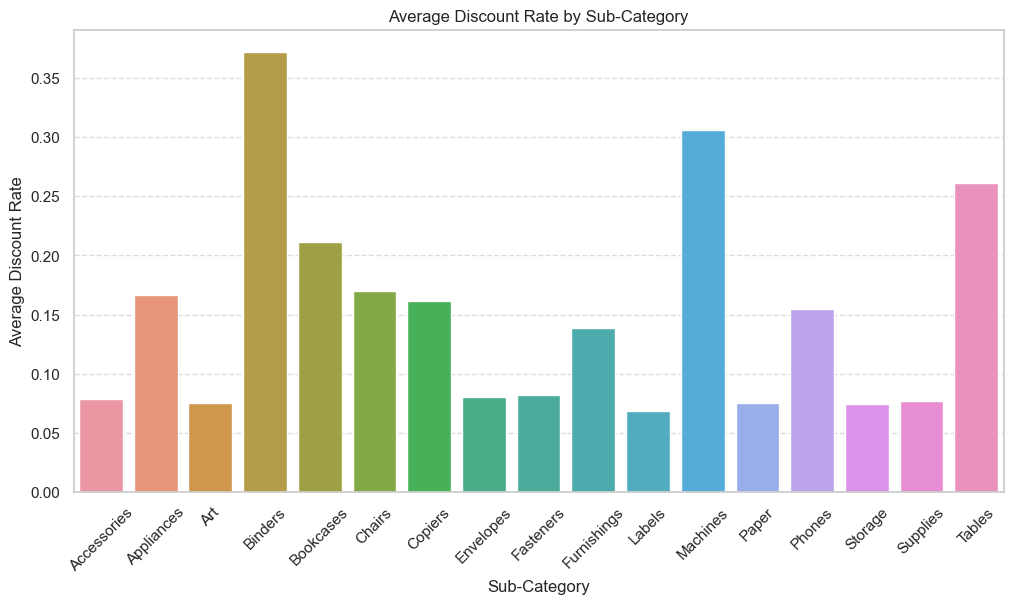

In [42]:
subcat_discounts = df.groupby('Sub-Category')['Discount'].mean().reset_index()

# Set up the color palette for the bar chart
sns.set_palette("husl")

# Create a bar chart to visualize discount trends for all sub-categories
plt.figure(figsize=(12, 6))
sns.barplot(data=subcat_discounts, x='Sub-Category', y='Discount')
plt.xlabel('Sub-Category')
plt.ylabel('Average Discount Rate')
plt.title('Average Discount Rate by Sub-Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

## Q10. Choose a suitable discount rate for individual subcategory products?

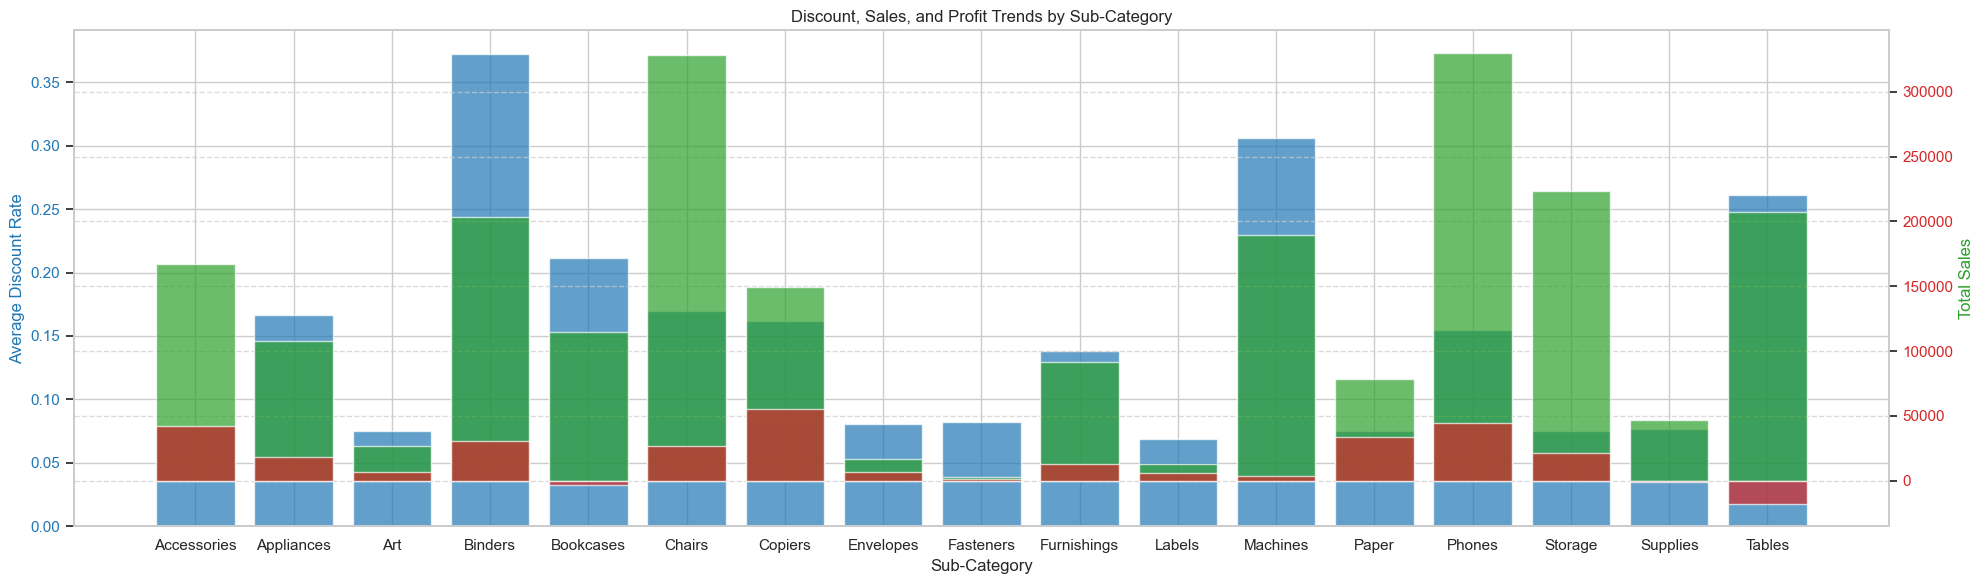

In [43]:

subcat_data = df.groupby('Sub-Category').agg({'Discount': 'mean', 'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Set up the color palette for the plot
sns.set_palette("husl")

# Create a dual-axis plot to show discount, sales, and profit for all sub-categories
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot the discount data
color = 'tab:blue'
ax1.set_xlabel('Sub-Category')
ax1.set_ylabel('Average Discount Rate', color=color)
ax1.bar(subcat_data['Sub-Category'], subcat_data['Discount'], color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for sales and profit
ax2 = ax1.twinx()

# Plot the sales data
color = 'tab:green'
ax2.set_ylabel('Total Sales', color=color)
ax2.bar(subcat_data['Sub-Category'], subcat_data['Sales'], color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

# Plot the profit data
color = 'tab:red'
ax2.bar(subcat_data['Sub-Category'], subcat_data['Profit'], color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

# Rotate x-axis labels for better readability
plt.xticks(rotation=5)


# Add labels and title
plt.title('Discount, Sales, and Profit Trends by Sub-Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Dishboard

---



### Download Necessary package

In [44]:
pip install pywedge

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: C:\Users\EXNASIR\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


### Import library for dishboard

In [45]:
import pywedge as pw

### Select the Target Variable

In [46]:
mc = pw.Pywedge_Charts(df, c= None, y= 'Sales')

C:\Users\EXNASIR\AppData\Local\Programs\Python\Python310\lib\site-packages\pywedge\pywedge.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  self.X = self.train.drop(self.y,1)


In [47]:
charts = mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

## Recommendations

1. Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.

2. Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.

3. For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.

4. For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.

5. Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.

6. Chose a 0.8 average discount on higher sales product and bundled with low sales products